In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [2]:
data = pd.read_csv('./merged.csv')

In [3]:
data = data.drop(['Sample_Number'], axis=1)

In [4]:
data.tail()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_776,Feature_777,Feature_778,Feature_779,Feature_780,Feature_781,Feature_782,Feature_783,Feature_784,label
487,153,157,141,116,117,113,106,98,87,81,...,74,74,74,75,75,75,75,75,75,2
488,112,118,123,124,121,118,109,94,87,81,...,74,75,74,75,75,74,73,74,76,2
489,115,117,114,113,102,88,83,79,78,78,...,77,77,77,78,76,77,75,75,86,2
490,117,126,144,153,134,109,91,81,76,79,...,78,78,77,77,76,74,76,77,80,2
491,116,116,116,113,106,97,89,83,78,81,...,74,72,72,74,75,75,72,73,84,2


In [5]:
# 特徴量とラベルの取得
X = data.drop('label', axis=1)  # ラベル列を除いた特徴量
y = data['label']  # ラベル列

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルの作成と学習
model = RandomForestClassifier()
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# モデルの評価
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# モデルを保存
joblib.dump(model, 'number_classifier.pkl')

# 別のデータセットの読み込み
new_data = pd.read_csv('test_merged.csv')
new_data = new_data.drop(['Sample_Number'], axis=1)

# 特徴量とラベルの取得
X_new = new_data.drop('label', axis=1)
y_new = new_data['label']

# モデルの読み込み
# model = joblib.load('your_model.pkl')

# モデルを使用して予測
y_pred_new = model.predict(X_new)

# 正解率の評価
accuracy_new = accuracy_score(y_new, y_pred_new)
print("Accuracy (new dataset):", accuracy_new)

Accuracy: 1.0
Accuracy (new dataset): 1.0


In [6]:
new_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_776,Feature_777,Feature_778,Feature_779,Feature_780,Feature_781,Feature_782,Feature_783,Feature_784,label
0,119,118,121,127,127,124,121,119,119,120,...,77,76,72,73,77,73,80,110,117,4
1,141,142,139,139,138,139,139,139,138,138,...,79,78,76,75,74,77,85,92,94,4
2,122,122,121,125,129,124,119,116,118,118,...,74,75,74,74,74,72,87,111,109,4
3,119,121,124,125,123,120,118,118,119,120,...,74,74,73,73,73,70,85,116,118,4
4,147,147,143,115,108,120,134,138,143,138,...,76,78,78,79,78,79,86,94,97,4


In [7]:
y_pred_new

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [8]:
model = joblib.load('number_classifier.pkl')

In [9]:
from PIL import Image
import os
from IPython.display import display

input_path = './pic1.png'

# 1920x1200の画像を開く
image = Image.open(input_path)

# 画像をグレースケールに変換
gray_image = image.convert("L")

# 画像のサイズを取得
width, height = gray_image.size

# クロップする矩形の上辺のY座標
top = 945
bottom = 1000

# クロップする矩形の幅（横方向に8等分する）
crop_width = 40

p1_score_images = []
p2_score_images = []

# 画像をクロップして保存
for i in range(8):
    # クロップする矩形の左上座標と右下座標を計算
    left = 352 + crop_width * i
    right = left + crop_width

    # 画像をクロップ
    p1_score_images.append(gray_image.crop((left, top, right, bottom)))

for i in range(8):
    # クロップする矩形の左上座標と右下座標を計算
    left = 352 + crop_width * i + 900
    right = left + crop_width

    # 画像をクロップ
    p2_score_images.append(gray_image.crop((left, top, right, bottom)))

In [10]:
type(p1_score_images[0])

PIL.Image.Image

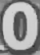

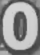

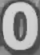

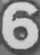

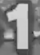

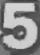

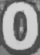

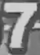

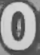

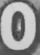

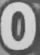

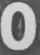

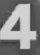

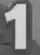

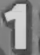

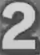

In [11]:
# 画像の一覧表示
for file in p1_score_images:
    display(file)
for file in p2_score_images:
    display(file)

In [15]:
import numpy as np
# 28*28にサイズ変更
p1_score_images_resized = []
p2_score_images_resized = []

for file in p1_score_images:
    resized = file.resize((28, 28))
    array = np.array(resized)
    flatten = array.flatten()
    p1_score_images_resized.append(flatten)
for file in p2_score_images:
    resized = file.resize((28, 28))
    array = np.array(resized)
    flatten = array.flatten()
    p2_score_images_resized.append(flatten)

In [16]:
len(p1_score_images_resized[0])

784

In [20]:
# data = data.drop(['label'], axis=1)
new_df = pd.DataFrame(p1_score_images_resized, columns=data.columns)

In [21]:
new_df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_775,Feature_776,Feature_777,Feature_778,Feature_779,Feature_780,Feature_781,Feature_782,Feature_783,Feature_784
0,-124,-125,-125,-127,125,-128,-126,121,96,81,...,82,81,76,80,102,127,-107,-92,-89,-87
1,-125,-110,-95,-88,-88,-104,122,91,78,79,...,82,80,74,82,95,113,-127,-116,-113,-110
2,-105,-107,-110,-116,-122,127,114,101,87,80,...,78,76,74,77,81,93,106,113,116,118
3,118,-119,-105,-101,-101,-114,117,88,78,81,...,81,80,80,82,87,96,108,116,119,121
4,-97,-101,-122,124,125,125,126,126,125,121,...,73,78,72,80,91,109,120,122,123,123


In [ ]:
predictions = model.predict(new_df)

In [ ]:
predictions